In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd "/content/drive/MyDrive/Selection-of-criminals_with_syndata/CTGAN_syndata_generaton" 

/content/drive/MyDrive/Selection-of-criminals_with_syndata/CTGAN_syndata_generaton


In [4]:
!pip install sdmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.7/140.7 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 6.2 MB/s eta 0:00:00


# 3. Review Generated Data Similarity(Coverage)

- We check the statistical similarity by measuring the range of the real data included by the generated data.
- Generally, wider the range included by the generated data, more similar the data.
- We check for each column the range included by the generated data.
- Label that has the same value for all columns as the original data does not exist in the synthetic data. 

 ## Load Data

In [5]:
import pandas as pd
import copy

In [6]:
df_syn_01 = pd.read_csv('./data_sample/df_syn_en_14.csv', encoding='utf-8-sig') #New synthetic data

In [7]:
df_syn_base = pd.read_csv('df_syn_en.csv', encoding='utf-8-sig') #Existing synthetic data

In [8]:
copy_syn = copy.deepcopy(df_syn_01)

In [9]:
copy_base = copy.deepcopy(df_syn_base)

## Check the Coverage of Generated Data Against the Real Data

### Check Category Type Data Coverage

- This metric measures whether a synthetic column covers all the possible categories that are present in a real column.

#### Data Compatibility

- Categorical: This metric is meant for discrete, categorical data
- Boolean: This metric is meant for boolean data


- The plot below shows some simulated real and synthetic data (black and green respectively) with CategoryCoverage=0.6.

#### Score
- (Best) 1.0: The synthetic column contains all the unique categories present in the real column
- (Worst) 0.0: The synthetic column contains none of the categories present in the real column

![Category Coverage](https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2F2yn1OQLODOesNLVjnpe2%2FCategory%20Coverage.png?alt=media&token=e12f6f08-d3b0-4e05-9a41-58b8a28d4a4e)

- This metric first computes the number of unique categories, c, that are present in the real column r. Then it computes the number of those categories present in the synthetic column, s. Finally, it returns the proportion of real categories that are in the synthetic data.


In [10]:
# Calculate the coverage score of 'dec_custom_code' column.
from sdmetrics.single_column import CategoryCoverage

CategoryCoverage.compute(
    real_data=copy_base['dec_custom_code'],
    synthetic_data=copy_syn['dec_custom_code']
)

0.5813953488372093

### Plot the Coverage Graph of Category Type Columns

- Generate dataframes that will store the coverage score for each category type column.

In [2]:
#Generate dataframes that will store the coverage score for each category type column.
CC_score = pd.DataFrame({'Category':[],'Score':[]})

#Assign columns of category type to a variable.
Range_columns = ['dec_custom_code','imp_dec_code','imp_trd_code','imp_typ_code',\
                 'collect_code','typ_transport_code','dec_mark','importer','ovs_cust_code',\
                 'exps_carr_code','HS10','country_ship_code','country_orig_code','trff_class_code',\
                 'country_orig_mark_code','crime_yn','key_exposure']

#Using the index and values of real data to calculate the coverage score, then store in a dataframe.
for idx,val in enumerate(copy_base):
    score = 0 
    if val in Range_columns:
        score = CategoryCoverage.compute(
            real_data=copy_base[val],
            synthetic_data=copy_syn[val]
        )
    CC_score.loc[idx] = [val,score]

NameError: name 'pd' is not defined

- We load the library for visualizing the dataframe that contains the coverage scores as graphs.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

- Using the calculated coverage score, plot a bar graph.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'dec_custom_code'),
  Text(1, 0, 'imp_dec_code'),
  Text(2, 0, 'imp_trd_code'),
  Text(3, 0, 'imp_typ_code'),
  Text(4, 0, 'collect_code'),
  Text(5, 0, 'typ_transport_code'),
  Text(6, 0, 'dec_mark'),
  Text(7, 0, 'importer'),
  Text(8, 0, 'ovs_cust_code'),
  Text(9, 0, 'exps_carr_code'),
  Text(10, 0, 'HS10'),
  Text(11, 0, 'country_ship_code'),
  Text(12, 0, 'country_orig_code'),
  Text(13, 0, 'trff_class_code'),
  Text(14, 0, 'country_orig_mark_code'),
  Text(15, 0, 'crime_yn'),
  Text(16, 0, 'key_exposure')])

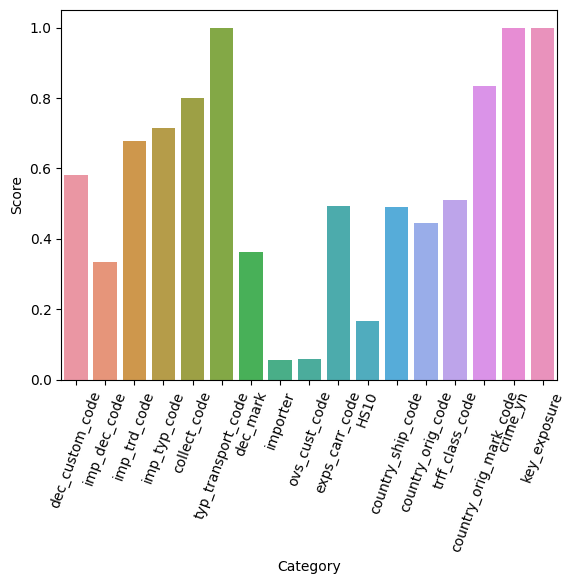

In [13]:
#Since there cannot be negative values due to category data's formula, 
#we add a condition for removing negative values then assign to variable 'data'. 
sns.barplot(x='Category',y ='Score', data = CC_score[CC_score['Score'] > 0])
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
plt.xticks(rotation =70)

### Check the Data Coverage of Numerical Data

- This metric measures whether a synthetic column covers the full range of values that are present in a real column.

#### Data Compatibility
- Numerical : This metric is meant for continuous, numerical data
- Datetime : This metric converts datetime values into numerical values


* The plot below shows some simulated real and synthetic data (black and green respectively) with RangeCoverage=0.82.

#### Score
- (Best) 1.0: The synthetic column covers the range of values present in the real column
- (Worst) 0.0: The synthetic column does not overlap at all with the range of values in the real column


![Value](https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2FUa21ikMRPxduAFIpovjM%2FRange%20Coverage.png?alt=media&token=bb7dca22-ad7d-4521-8523-e683588deb2b)

In [14]:
#Calculate the coverage score of 'trff_rate' column.
from sdmetrics.single_column import RangeCoverage

RangeCoverage.compute(
    real_data=copy_base['trff_rate'],
    synthetic_data=copy_syn['trff_rate']
)

0.5001988598700783

### Plot the Coverage Graph for Each Numerical Column

- Generate a dataframe that stores coverage score for each numerical column.

In [3]:
# Create a dataframe to store coverage scores for each numerical column.
RC_score = pd.DataFrame({'Category':[],'Score':[]})

#Assign numerical columns to a variable.
Range_columns = ['trff_rate','dec_weight','taxabal_price_KRW']

#Using the index and values of the real data, calculate the coverage score against the synthetic data.
#Store the result to a dataframe.
for idx,val in enumerate(copy_base):
    score = 0 
    if val in Range_columns:
        score = RangeCoverage.compute(
            real_data=copy_base[val],
            synthetic_data=copy_syn[val]
        )
    RC_score.loc[idx] = [val,score]

NameError: name 'pd' is not defined

- Using the calculated coverage score, plot a bar graph.
- From the three values, trff_rate's value is high, which has relatively low distribution.

(array([0, 1, 2]),
 [Text(0, 0, 'trff_rate'),
  Text(1, 0, 'dec_weight'),
  Text(2, 0, 'taxabal_price_KRW')])

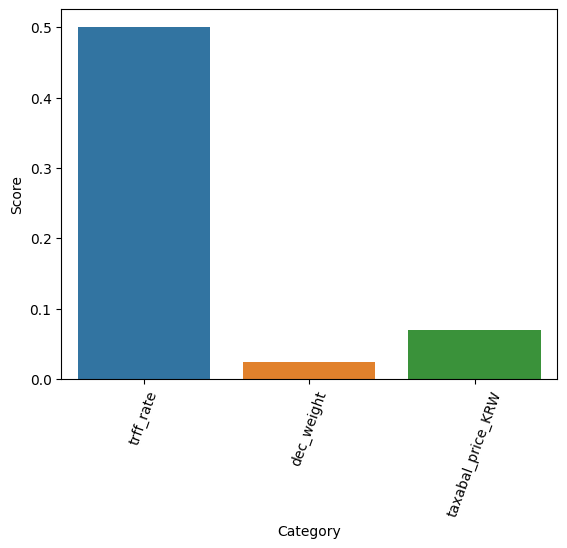

In [16]:
sns.barplot(x='Category',y ='Score', data = RC_score[RC_score['Score'] > 0])
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
plt.xticks(rotation =70)

## Combining the Results

### Combine Two Result Dataframes

- Substitute RC_score's values to trff_rate, dec_weight, and taxabal_price_KRW columns in CC_Score. 

In [17]:
CC_score.loc[[15,18,19],'Score'] = RC_score.loc[[15,18,19],'Score']

- Check the total score.
- We can see that categorical data with less unique value type generally have wider cover range.
- imp_dec_code is biased for one value out of three values, so it has low coverage range.

In [18]:
#Count the unique values of 'imp_dec_code' 
copy_base['imp_dec_code'].value_counts()

B    53992
D        7
A        1
Name: imp_dec_code, dtype: int64

In [19]:
Total_score = CC_score

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'dec_custom_code'),
  Text(1, 0, 'imp_dec_code'),
  Text(2, 0, 'imp_trd_code'),
  Text(3, 0, 'imp_typ_code'),
  Text(4, 0, 'collect_code'),
  Text(5, 0, 'typ_transport_code'),
  Text(6, 0, 'dec_mark'),
  Text(7, 0, 'importer'),
  Text(8, 0, 'ovs_cust_code'),
  Text(9, 0, 'exps_carr_code'),
  Text(10, 0, 'HS10'),
  Text(11, 0, 'country_ship_code'),
  Text(12, 0, 'country_orig_code'),
  Text(13, 0, 'trff_rate'),
  Text(14, 0, 'trff_class_code'),
  Text(15, 0, 'country_orig_mark_code'),
  Text(16, 0, 'dec_weight'),
  Text(17, 0, 'taxabal_price_KRW'),
  Text(18, 0, 'crime_yn'),
  Text(19, 0, 'key_exposure')])

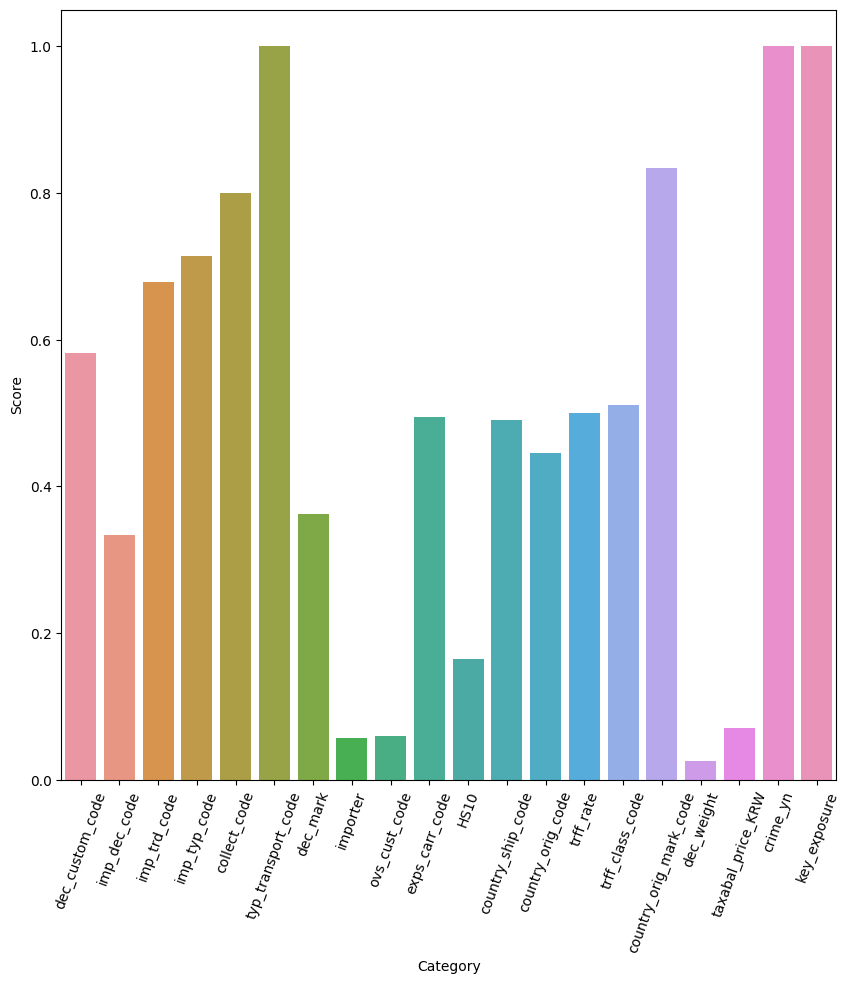

In [20]:
plt.figure(figsize=(10,10))
colors = sns.color_palette('Greys', 1)
sns.barplot(x='Category',y ='Score', data = Total_score[Total_score['Score'] > 0])
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
plt.xticks(rotation =70)